# 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

a. Choose features other than the ones used in the lesson.

b. Visualize the results of your clustering.

c. Use the elbow method to visually select a good value for k.

d. Repeat the clustering, this time with 3 different features.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

import acquire


In [2]:
# import iris data set 
from pydataset import data

# import data
iris = data('iris')
iris.sample(15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
13,4.8,3.0,1.4,0.1,setosa
132,7.9,3.8,6.4,2.0,virginica
91,5.5,2.6,4.4,1.2,versicolor
32,5.4,3.4,1.5,0.4,setosa
80,5.7,2.6,3.5,1.0,versicolor
19,5.7,3.8,1.7,0.3,setosa
36,5.0,3.2,1.2,0.2,setosa
23,4.6,3.6,1.0,0.2,setosa
89,5.6,3.0,4.1,1.3,versicolor
12,4.8,3.4,1.6,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


a. Choose features other than the ones used in the lesson.

In [4]:
X = iris[['sepal_width', 'petal_width']]

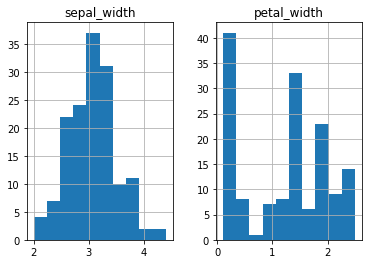

In [5]:
# look at distribution of sepal length and petal_length

X.hist();

In [6]:
# Scale the X

# It uses standar diviation as the unit to scale the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# look at the head the scaled data
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [8]:
# sklearn implementation of KMeans

# define the thing
# use only 3 clusters
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [9]:
# Add the 
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
95,5.6,2.7,4.2,1.3,versicolor,2
56,5.7,2.8,4.5,1.3,versicolor,2
98,6.2,2.9,4.3,1.3,versicolor,2
111,6.5,3.2,5.1,2.0,virginica,1
34,5.5,4.2,1.4,0.2,setosa,0
28,5.2,3.5,1.5,0.2,setosa,0
46,4.8,3.0,1.4,0.3,setosa,0
127,6.2,2.8,4.8,1.8,virginica,1
97,5.7,2.9,4.2,1.3,versicolor,2
54,5.5,2.3,4.0,1.3,versicolor,2


b. Visualize the results of your clustering.

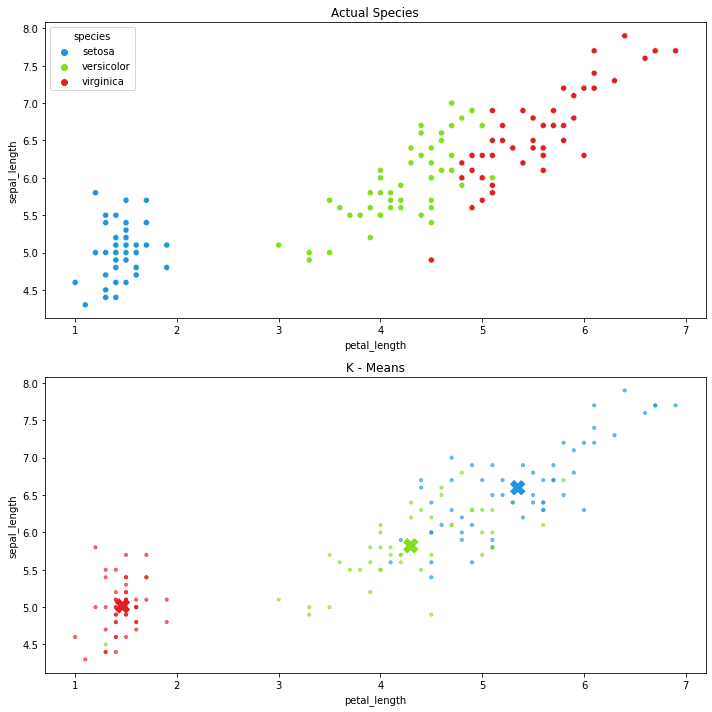

In [10]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

c. Use the elbow method to visually select a good value for k.

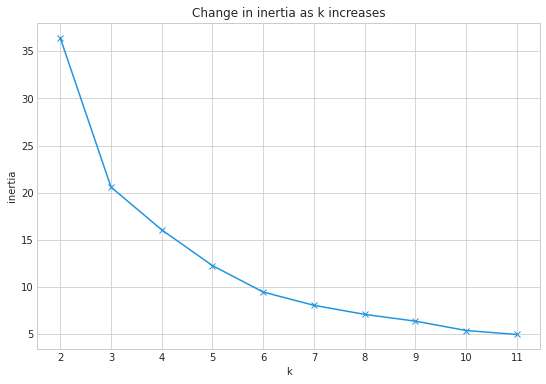

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


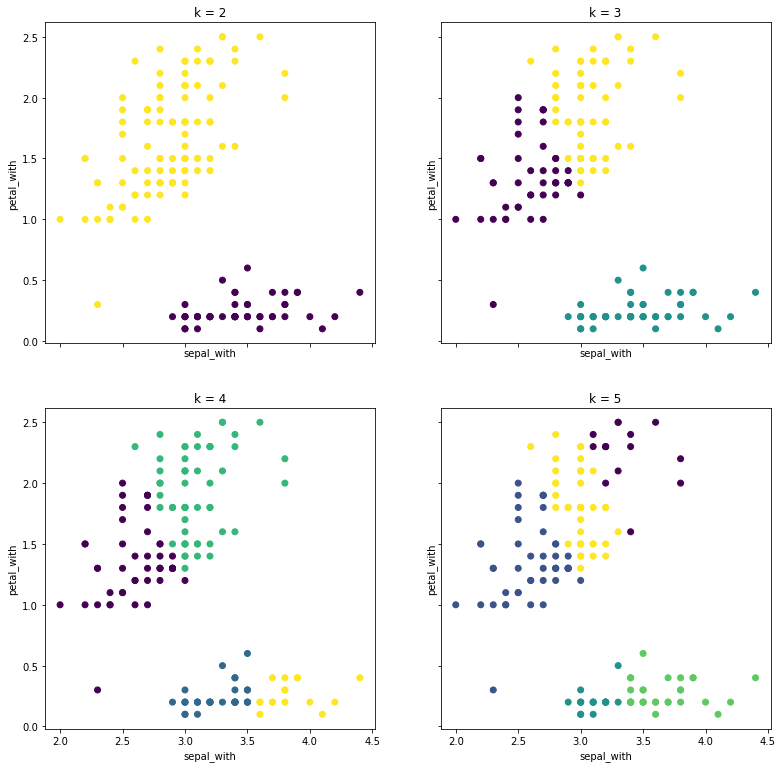

In [12]:
# Visulize data with differtente quantity of k
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_with', ylabel='petal_with')

d. Repeat the clustering, this time with 3 different features.

In [13]:
X = iris[['sepal_width', 'petal_width', 'sepal_length']]

array([[<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'sepal_length'}>, <AxesSubplot:>]],
      dtype=object)

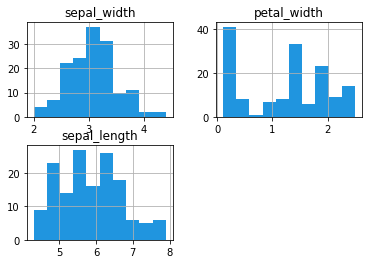

In [14]:
X.hist()

In [15]:
# Scale the X

# It uses standar diviation as the unit to scale the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [16]:
# look at the head of the newly scaled data 
X_scaled.head()

,sepal_width,petal_width,sepal_length
1,1.019004,-1.315444,-0.900681
2,-0.131979,-1.315444,-1.143017
3,0.328414,-1.315444,-1.385353
4,0.098217,-1.315444,-1.506521
5,1.249201,-1.315444,-1.021849


In [17]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [18]:
iris['cluster'] = kmeans.predict(X_scaled)
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
103,7.1,3.0,5.9,2.1,virginica,0
40,5.1,3.4,1.5,0.2,setosa,1
23,4.6,3.6,1.0,0.2,setosa,1
72,6.1,2.8,4.0,1.3,versicolor,2
130,7.2,3.0,5.8,1.6,virginica,0
39,4.4,3.0,1.3,0.2,setosa,1
82,5.5,2.4,3.7,1.0,versicolor,2
49,5.3,3.7,1.5,0.2,setosa,1
75,6.4,2.9,4.3,1.3,versicolor,2
37,5.5,3.5,1.3,0.2,setosa,1


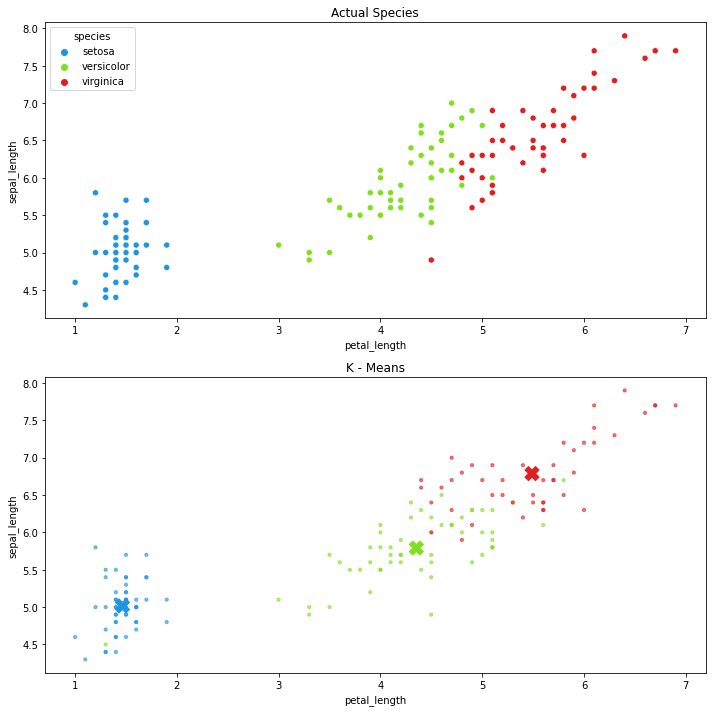

In [19]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

In [20]:
X = iris[['sepal_width', 'petal_width', 'sepal_length']]

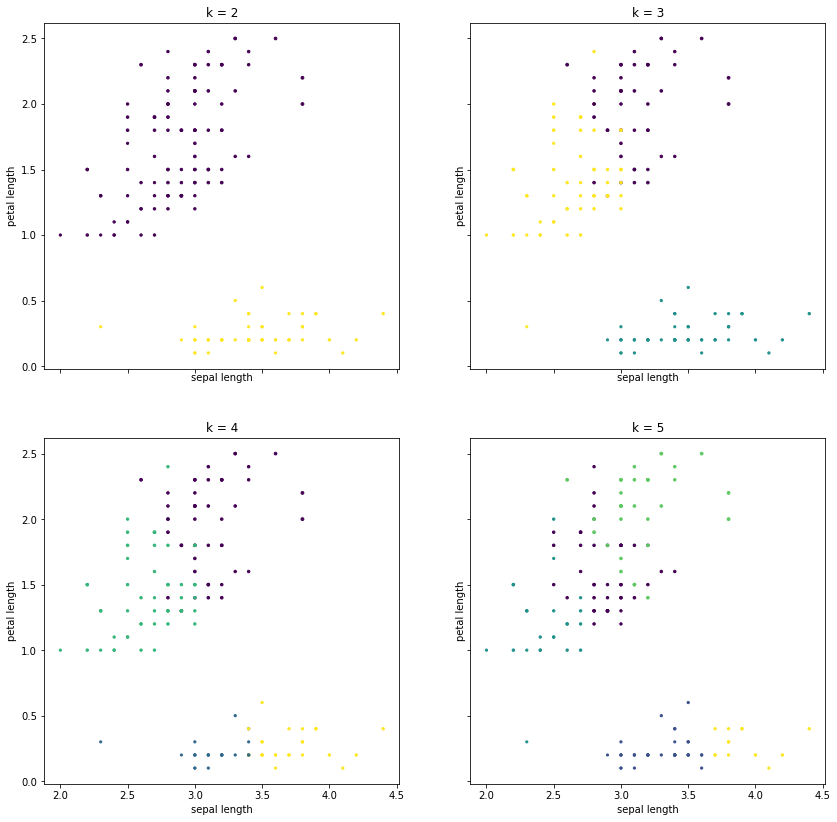

In [21]:
# Visulize data with differtente quantity of k
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(14, 14), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, X.sepal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

--------------------------------------------

# 2.
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [22]:
df = acquire.mall_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
# create dummy vars of 'gender' column, drop the first dummy var and keep remaining. 
# In testing, I see there is one dummy var returned, 'Male', so I 
# create a new column in our df, 'is_male', to hold the values for the new dummy var. 

df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
df.drop(columns=['gender'], inplace=True)
df.head()

,customer_id,age,annual_income,spending_score,is_male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     200 non-null    int64
 1   age             200 non-null    int64
 2   annual_income   200 non-null    int64
 3   spending_score  200 non-null    int64
 4   is_male         200 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


In [25]:
# chose continues variables
X = df[['annual_income', 'spending_score']]

In [26]:
# Scale the X

# It uses standar diviation as the unit to scale the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [27]:
# look at the head
X_scaled.head()

,annual_income,spending_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [28]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  560
validate observations:  240
test observations:  200


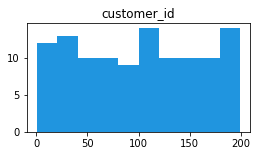

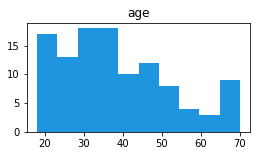

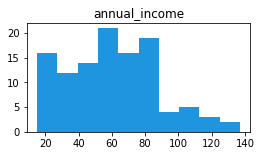

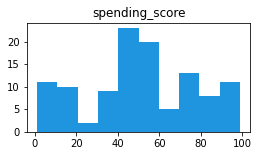

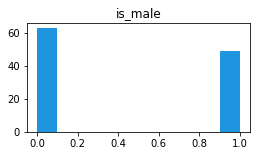

In [29]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [30]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=5, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [31]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [32]:
# lets look at sample of 15 randomly selected rows in iris dataset

df.sample(15)

,customer_id,age,annual_income,spending_score,is_male,cluster
178,179,59,93,14,1,2
152,153,44,78,20,0,2
79,80,49,54,42,0,0
104,105,49,62,56,1,0
136,137,44,73,7,0,2
35,36,21,33,81,0,4
128,129,59,71,11,1,2
14,15,37,20,13,1,3
168,169,36,87,27,0,2
170,171,40,87,13,1,2


In [33]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
plt.figure(figsize=(14, 9))
centroids

,annual_income,spending_score
0,-0.200913,-0.026456
1,0.991583,1.239503
2,1.055003,-1.284439
3,-1.307519,-1.136965
4,-1.329545,1.132178


<Figure size 1008x648 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


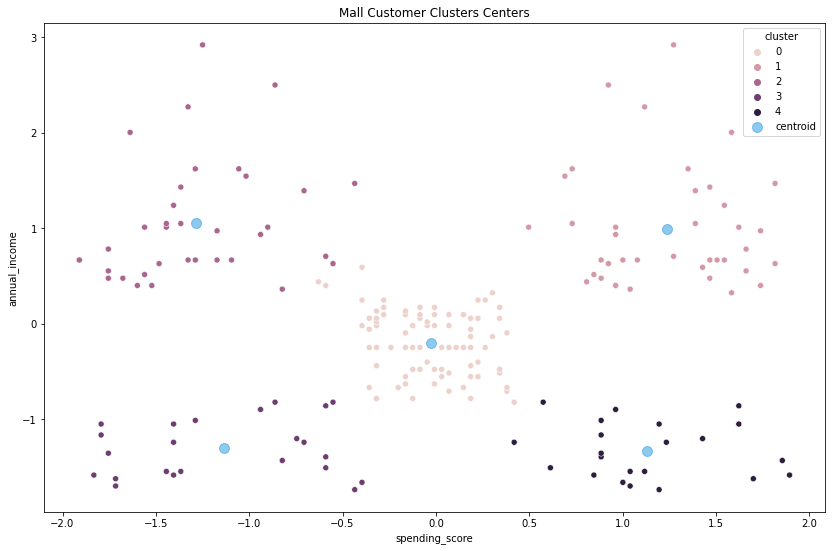

In [51]:
plt.figure(figsize=(14, 9))

# visualize clusters
sns.scatterplot(x='spending_score', y='annual_income', data=X_scaled, hue='cluster')
centroids.plot.scatter(x='spending_score', y='annual_income', label='centroid',
                      ax=plt.gca(),
                      s=100, alpha=0.5)
plt.title('Mall Customer Clusters Centers');

------------------------

In [35]:
# read google sheet into panda dataframe
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv&?usp=sharing")
data

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


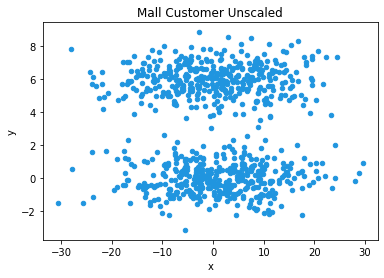

In [52]:
# visualize data

data.plot.scatter(x='x', y='y')
plt.title('Mall Customer Unscaled');

In [37]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(data)

# Use (predict using) the thing 
kmeans.predict(data)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [38]:
# create column with cluster
data['cluster'] = kmeans.predict(data)
data.sample(10)

,x,y,cluster
507,-5.992909,5.329294,1
318,5.496860,-0.123357,0
391,1.791939,0.479200,0
771,-23.682775,6.091747,1
659,15.212797,5.414374,0
769,-4.421155,4.317542,1
506,8.901257,6.597478,0
273,3.912736,0.786513,0
737,-6.031403,5.420494,1
784,5.139280,6.896364,0


<AxesSubplot:xlabel='x', ylabel='y'>

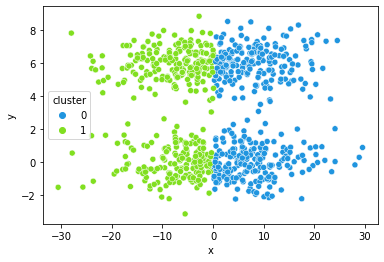

In [39]:
# scatterplot using sns 
sns.scatterplot(x='x', y='y', data=data, hue='cluster')


Text(0.5, 1.0, 'Scaled')

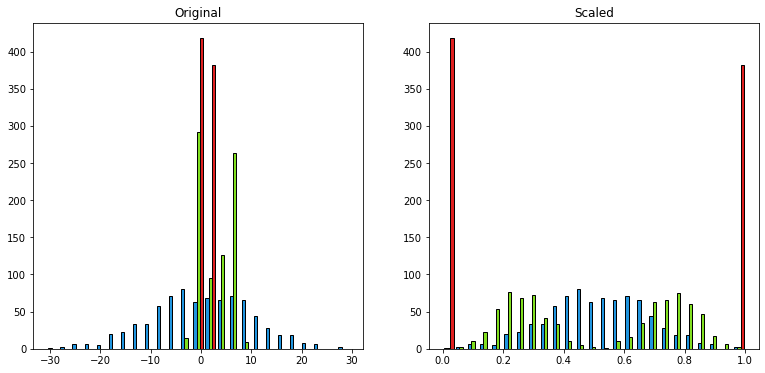

In [40]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(data)

data_scaled = scaler.transform(data)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(data, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(data_scaled, bins=25, ec='black')
plt.title('Scaled')

In [41]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(data_scaled)

# Use (predict using) the thing 
kmeans.predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [42]:
data['cluster'] = kmeans.predict(data_scaled)

In [43]:
data.head()

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0


In [44]:
# scatterplot using sns and the scaled data  
sns.scatterplot(x='x', y='y', data=data_scaled, hue='cluster')

ValueError: Could not interpret value `x` for parameter `x`